In [1]:
import pandas as pd
import numpy as np
import itertools
import time
import seaborn as sn
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import math

%matplotlib inline


In [2]:
baseball = pd.read_table('http://jse.amstat.org/datasets/baseball.dat.txt',
                         header=None, sep="\s+", names=["salary", "batting.avg", "OBP", "runs",
                                                        "hits", "doubles", "triples", "homeruns", "RBI", "walks", "strike.outs",
                                                        "stolen.bases", "errors", "free.agency.elig", "free.agent.91",
                                                        "arb.elig", "arb.91", "name"])
baseball.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   salary            337 non-null    int64  
 1   batting.avg       337 non-null    float64
 2   OBP               337 non-null    float64
 3   runs              337 non-null    int64  
 4   hits              337 non-null    int64  
 5   doubles           337 non-null    int64  
 6   triples           337 non-null    int64  
 7   homeruns          337 non-null    int64  
 8   RBI               337 non-null    int64  
 9   walks             337 non-null    int64  
 10  strike.outs       337 non-null    int64  
 11  stolen.bases      337 non-null    int64  
 12  errors            337 non-null    int64  
 13  free.agency.elig  337 non-null    int64  
 14  free.agent.91     337 non-null    int64  
 15  arb.elig          337 non-null    int64  
 16  arb.91            337 non-null    int64  
 1

In [3]:
baseball.head()  # Check summary statistics


,salary,batting.avg,OBP,runs,hits,doubles,triples,homeruns,RBI,walks,strike.outs,stolen.bases,errors,free.agency.elig,free.agent.91,arb.elig,arb.91,name
0,3300,0.272,0.302,69,153,21,4,31,104,22,80,4,3,1,0,0,0,Andre Dawson
1,2600,0.269,0.335,58,111,17,2,18,66,39,69,0,3,1,1,0,0,Steve Buchele
2,2500,0.249,0.337,54,115,15,1,17,73,63,116,6,5,1,0,0,0,Kal Daniels
3,2475,0.260,0.292,59,128,22,7,12,50,23,64,21,21,0,0,1,0,Shawon Dunston
4,2313,0.273,0.346,87,169,28,5,8,58,70,53,3,8,0,0,1,0,Mark Grace


In [4]:
baseball.columns = baseball.columns.str.replace('.', '')


C:\Users\nikol\AppData\Local\Temp/ipykernel_27052/4092296004.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  baseball.columns = baseball.columns.str.replace('.', '')


In [5]:
baseball.describe()  # Check summary statistics


,salary,battingavg,OBP,runs,hits,doubles,triples,homeruns,RBI,walks,strikeouts,stolenbases,errors,freeagencyelig,freeagent91,arbelig,arb91
count,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000
mean,1248.528190,0.257825,0.323973,46.697329,92.833828,16.673591,2.338279,9.097923,44.020772,35.017804,56.706231,8.246291,6.771513,0.397626,0.115727,0.192878,0.029674
std,1240.013309,0.039546,0.047132,29.020166,51.896322,10.452001,2.543336,9.289934,29.559406,24.842474,33.828784,11.664782,5.927490,0.490135,0.320373,0.395145,0.169938
min,109.000000,0.063000,0.063000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,230.000000,0.238000,0.297000,22.000000,51.000000,9.000000,0.000000,2.000000,21.000000,15.000000,31.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,740.000000,0.260000,0.323000,41.000000,91.000000,15.000000,2.000000,6.000000,39.000000,30.000000,49.000000,4.000000,5.000000,0.000000,0.000000,0.000000,0.000000
75%,2150.000000,0.281000,0.354000,69.000000,136.000000,23.000000,3.000000,15.000000,66.000000,49.000000,78.000000,11.000000,9.000000,1.000000,0.000000,0.000000,0.000000
max,6100.000000,0.457000,0.486000,133.000000,216.000000,49.000000,15.000000,44.000000,133.000000,138.000000,175.000000,76.000000,31.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
baseball.shape  # Check data dimension


(337, 18)

1. Exploratory Data Analysis: First prepare your data

(a)Obtain the histograms of both salary and the logarithm (natural base) of
salary and comment. Proceed with the log-transformed salary from this step
on.

(array([61., 27., 32., 23., 34., 36., 23., 54., 36., 11.]),
 array([ 6.76818432,  7.34882525,  7.92946617,  8.51010709,  9.09074801,
         9.67138893, 10.25202985, 10.83267077, 11.41331169, 11.99395261,
        12.57459353]),
 <BarContainer object of 10 artists>)

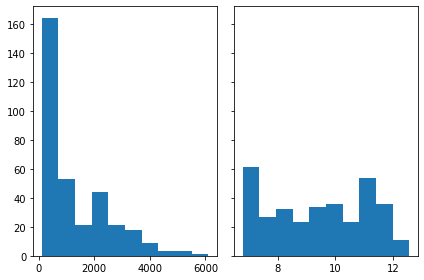

In [8]:
salary = baseball.salary
log_salary = np.log2(baseball.salary)

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(salary)
axs[1].hist(log_salary)


(b) Inspect the data and answer these questions: Are there any missing data?
Among all the predictors, how many of them are continuous, integer counts,
and categorical, respectively?

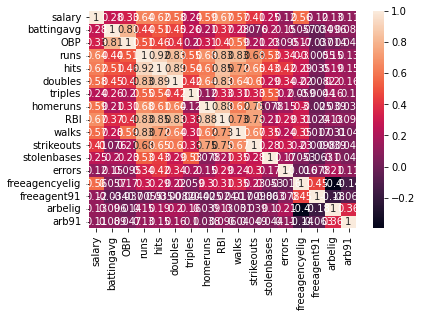

In [9]:
# CORRELATION MATRIX
corrMatrix = baseball.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()


2. Linear Regression:

Fit a multiple linear regression model using the entire baseball data. Call
it fit_full. Provide the output from the model and interpret the results –
Which of the variables are significant etc.

In [10]:
#"batting.avg" breaks the function

In [20]:
clean_data = baseball.drop(columns=['salary', 'name'])
clean_data


,battingavg,OBP,runs,hits,doubles,triples,homeruns,RBI,walks,strikeouts,stolenbases,errors,freeagencyelig,freeagent91,arbelig,arb91
0,0.272,0.302,69,153,21,4,31,104,22,80,4,3,1,0,0,0
1,0.269,0.335,58,111,17,2,18,66,39,69,0,3,1,1,0,0
2,0.249,0.337,54,115,15,1,17,73,63,116,6,5,1,0,0,0
3,0.260,0.292,59,128,22,7,12,50,23,64,21,21,0,0,1,0
4,0.273,0.346,87,169,28,5,8,58,70,53,3,8,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,0.111,0.138,3,3,0,0,0,1,1,7,0,0,0,0,0,0
333,0.264,0.318,24,48,7,0,1,22,15,18,0,7,0,0,0,0
334,0.187,0.281,38,50,9,2,15,37,32,98,0,9,0,0,0,0
335,0.264,0.270,24,74,16,0,3,27,5,42,0,10,0,0,0,0


In [12]:
def fit_full():
  all_columns = "+".join(baseball.columns.drop('salary').drop('name'))
  my_formula = "np.log(salary)~" + all_columns
  results = smf.ols(my_formula, data=baseball).fit()
  print(results.summary())


In [13]:
fit_full()

                            OLS Regression Results                            
Dep. Variable:         np.log(salary)   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     80.92
Date:                Mon, 25 Oct 2021   Prob (F-statistic):          4.63e-102
Time:                        23:44:20   Log-Likelihood:                -259.75
No. Observations:                 337   AIC:                             553.5
Df Residuals:                     320   BIC:                             618.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.3951      0.257     20.

2. Linear Regression:

(a) Partition the data randomly into two sets: the training data D0 and the test
data D1 with a ratio about 2:1. Set random_state = 42.

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    clean_data, log_salary, test_size=0.33, random_state=42)


(b) Using the training data D0, apply two variable selection methods:
i. Ridge Regression
ii. The Lasso

In [32]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3,
                        1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}
lasso_regressor = GridSearchCV(
    lasso, parameters, scoring='neg_mean_squared_error', cv=5)

lasso_regressor.fit(x_train, y_train)



D:\Code\Py\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.785e+01, tolerance: 5.350e-02
  model = cd_fast.enet_coordinate_descent(
D:\Code\Py\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.079e+01, tolerance: 5.532e-02
  model = cd_fast.enet_coordinate_descent(
D:\Code\Py\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.593e+01, tolerance: 5.254e-02
  model = cd_fast.enet_coordi

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [23]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3,
                        1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}
ridge_regressor = GridSearchCV(
    ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

(c) Report the essential steps and/or key quantities involved in each variable
selection methods.

(d) Output the necessary fitting results for each model, e.g., in particular, selected variables and their corresponding slope parameter estimates.

(e) Apply the models to the test data D1. Output the mean squared error(MSE).
Let’s consider the one yielding the minimum MSE as the “best" final model.

In [24]:
prediction_lasso = lasso_regressor.predict(x_test)
prediction_ridge = ridge_regressor.predict(x_test)


In [34]:
from sklearn.metrics import mean_squared_error
# Calculate the test MSE
print(mean_squared_error(y_test, prediction_ridge))


0.7007644629282652


In [35]:
# Calculate the test MSE
print(mean_squared_error(y_test, prediction_lasso))


0.7132569981169198


D:\Code\Py\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary', ylabel='Density'>

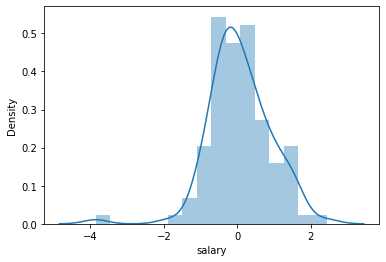

In [31]:
sn.distplot(y_test-prediction_lasso)


D:\Code\Py\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary', ylabel='Density'>

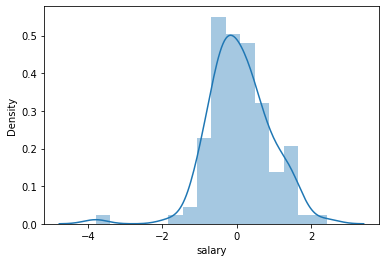

In [27]:
sn.distplot(y_test-prediction_ridge)